# Simple linear regression - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data. 

Apart from that, please:
-  Create a scatter plot (with or without a regression line)
-  Calculate the R-squared
-  Display the intercept and coefficient(s)
-  Using the model make a prediction about an apartment with size 750 sq.ft.

Note: In this exercise, the dependent variable is 'price', while the independent variable is 'size'.

Good luck!

## Import the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn
seaborn.set()

## Load the data

In [2]:
data = pd.read_csv('real_estate_price_size.csv')

In [5]:
data.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


## Create the regression

### Declare the dependent and the independent variables

In [6]:
x = data['size']
y = data['price']

### Explore the data

In [7]:
x.shape

(100,)

### Transform the inputs into a matrix (2D object)

In [8]:
x_matrix = x.values.reshape(-1,1)
y_matrix = y.values.reshape(-1,1)

### Regression itself

In [9]:
reg = LinearRegression()
reg.fit(x_matrix,y_matrix)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Calculate the R-squared

In [12]:
reg.score(x_matrix,y_matrix)

0.7447391865847586

### Find the intercept

In [13]:
reg.intercept_

array([101912.60180123])

### Find the coefficients

In [14]:
reg.coef_

array([[223.17874259]])

### Making predictions

You find an apartment online with a size of 750 sq.ft.

All else equal what should be its price according to the model?

In [15]:
reg.predict([[750]])

array([[269296.65874718]])

In [19]:
prediction = pd.DataFrame(data = [750,1000], columns = ['Size(sq. ft)'])

In [20]:
prediction['predicted_price'] = reg.predict(prediction)
prediction

,Size(sq. ft),predicted_price
0,750,269296.658747
1,1000,325091.344396


### Creating a scatter plot 

Text(0, 0.5, 'PRICE')

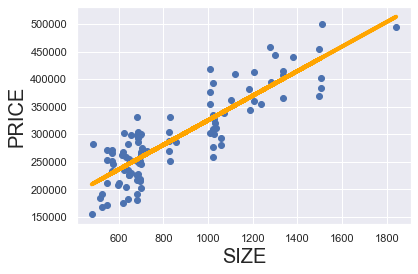

In [21]:
plt.scatter(x,y)
yhat = reg.intercept_ + reg.coef_ * x_matrix
fig1 = plt.plot(x,yhat,lw =4, c='orange', label= 'regression line')
plt.xlabel('SIZE', fontsize = 20)
plt.ylabel('PRICE', fontsize = 20)